# Linear Regression Practical Implementation

In [1]:
import pandas as pd

In [2]:
# from sklearn.datasets import load_boston 
#this dataset has been removed from scikit-learn sence version 1.2

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = fetch_california_housing()

In [6]:
dataset = pd.DataFrame(df.data)

In [7]:
dataset.columns = df.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Independent Features and Dependent Features

In [16]:
X = dataset
y = df.target

In [21]:
y.size

20640

In [23]:
# Train Test split
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [34]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5088,0.9809,19.0,3.187726,1.129964,726.0,2.620939,33.98,-118.28
17096,4.2232,33.0,6.189696,1.086651,1015.0,2.377049,37.46,-122.23
5617,3.5488,42.0,4.821577,1.095436,1044.0,4.331950,33.79,-118.26
20060,1.6469,24.0,4.274194,1.048387,1686.0,4.532258,35.87,-119.26
895,3.9909,14.0,4.608303,1.089350,2738.0,2.471119,37.54,-121.96
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.model_selection import cross_val_score

In [62]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [64]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',cv=5)

In [66]:
mse

array([-0.54099828, -0.49871687, -0.50480739, -0.5200183 , -0.55070903])

In [68]:
np.mean(mse)

-0.5230499763383926

In [70]:
reg_pred = regression.predict(X_test)

In [72]:
reg_pred

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279])

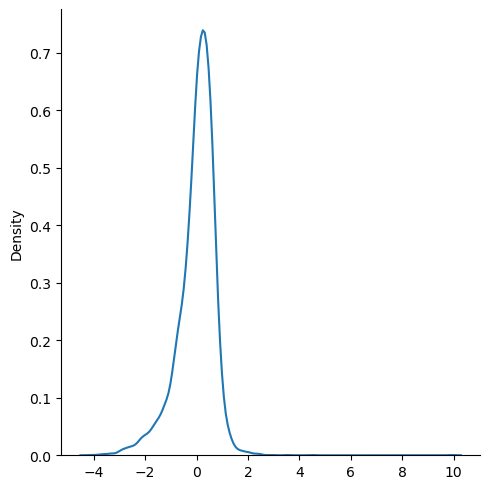

In [76]:
import seaborn as sns
sns.displot(reg_pred-y_test, kind='kde')

In [78]:
from sklearn.metrics import r2_score

In [80]:
score = r2_score(reg_pred, y_test)

In [82]:
score

0.33957429603867517